<a href="https://colab.research.google.com/github/Mo-null/Data-mining-I/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data
X = StandardScaler().fit_transform(X)
n = X.shape[0]

In [ ]:

k_values = [2,3,4,5,6]
init_methods = ['k-means++','random']
repeats = 5
results = []

for k in k_values:
    for init in init_methods:
        iners=[]; sils=[]
        for r in range(repeats):
            km = KMeans(n_clusters=k, init=init, n_init=10, random_state=42+r)
            labels = km.fit_predict(X)
            iners.append(km.inertia_/n)
            if len(np.unique(labels))>1:
                sils.append(silhouette_score(X, labels))
        results.append((k, init, np.mean(iners), np.std(iners),
                       np.mean(sils) if sils else np.nan,
                       np.std(sils) if sils else np.nan))

for r in results:
    print(f"k={r[0]}, init={r[1]:8s}, mse={r[2]:.4f}±{r[3]:.4f}, sil={r[4]:.4f}±{r[5]:.4f}")

k=2, init=k-means++, mse=1.4824±0.0000, sil=0.5818±0.0000
k=2, init=random  , mse=1.4824±0.0000, sil=0.5818±0.0000
k=3, init=k-means++, mse=0.9321±0.0000, sil=0.4599±0.0000
k=3, init=random  , mse=0.9321±0.0000, sil=0.4598±0.0002
k=4, init=k-means++, mse=0.7615±0.0007, sil=0.3855±0.0008
k=4, init=random  , mse=0.7613±0.0008, sil=0.3867±0.0010
k=5, init=k-means++, mse=0.6059±0.0006, sil=0.3441±0.0020
k=5, init=random  , mse=0.6070±0.0024, sil=0.3466±0.0051
k=6, init=k-means++, mse=0.5408±0.0041, sil=0.3329±0.0101
k=6, init=random  , mse=0.5388±0.0048, sil=0.3346±0.0070


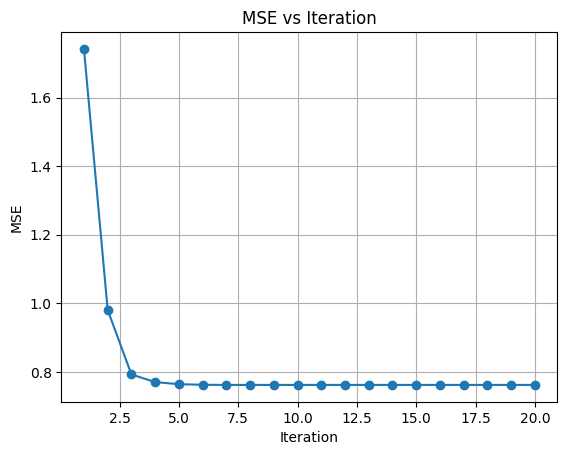

In [ ]:

km = KMeans(n_clusters=4, init='random', n_init=1, random_state=42, max_iter=1)
mse_history = []

km.fit(X)
mse_history.append(km.inertia_/n)

for it in range(2, 21):
    km = KMeans(n_clusters=4, init=km.cluster_centers_, n_init=1, max_iter=1)
    km.fit(X)
    mse_history.append(km.inertia_/n)

plt.plot(range(1, 21), mse_history, marker='o')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs Iteration')
plt.grid(True)
plt.show()